In [34]:
import folium
from folium import plugins
import requests
import pandas as pd

# GeoJSON 데이터의 URL
url = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

raw_data = [
    ['양천구', 0.25],
    ['영등포구', 0.24],
    ['중랑구', 0.24],
    ['구로구', 0.23],
    ['강남구', 0.22],
    ['송파구', 0.21],
    ['광진구', 0.21],
    ['강동구', 0.2],
    ['종로구', 0.19],
    ['강북구', 0.19],
    ['서초구', 0.19],
    ['성북구', 0.19],
    ['금천구', 0.19],
    ['은평구', 0.18],
    ['동대문구', 0.18],
    ['노원구', 0.17],
    ['강서구', 0.17],
    ['동작구', 0.17],
    ['용산구', 0.16],
    ['도봉구', 0.16],
    ['중구', 0.16],
    ['마포구', 0.16],
    ['서대문구', 0.15],
    ['성동구', 0.13],
    ['관악구', 0.12],
]

data = pd. DataFrame(raw_data, columns=['name','value'])
data

# GeoJSON 데이터 불러오기
response = requests.get(url)
geojson_data = response.json()

# 서울시 중심의 지도 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# GeoJSON 데이터를 지도에 추가
folium.GeoJson(geojson_data, name="geojson").add_to(seoul_map)

# 지도를 HTML 파일로 저장
seoul_map.save("seoul_map.html")

# 지도를 화면에 표시
seoul_map

In [35]:
#!pip install geopandas

In [36]:
import folium

geo_json =  "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

import pandas as pd

raw_data = [
    ['양천구', 0.25],
    ['영등포구', 0.24],
    ['중랑구', 0.24],
    ['구로구', 0.23],
    ['강남구', 0.22],
    ['송파구', 0.21],
    ['광진구', 0.21],
    ['강동구', 0.2],
    ['종로구', 0.19],
    ['강북구', 0.19],
    ['서초구', 0.19],
    ['성북구', 0.19],
    ['금천구', 0.19],
    ['은평구', 0.18],
    ['동대문구', 0.18],
    ['노원구', 0.17],
    ['강서구', 0.17],
    ['동작구', 0.17],
    ['용산구', 0.16],
    ['도봉구', 0.16],
    ['중구', 0.16],
    ['마포구', 0.16],
    ['서대문구', 0.15],
    ['성동구', 0.13],
    ['관악구', 0.12],
]

data = pd. DataFrame(raw_data, columns=['name','value'])

m = folium.Map(location=[37.566345,126.977893])

folium.Choropleth(geo_data=geo_json,
                  name='choropleth',
                  data=data,columns=['name','value'],
                  key_on='feature.properties.name',
                  fill_color='Reds',
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  highlight=True,
                  ).add_to(m)
m

In [37]:
import folium
import pandas as pd
import json

geo_json_url = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
geo_json_data = json.loads(requests.get(geo_json_url).text)

raw_data = [
    ['양천구', 0.25],
    ['영등포구', 0.24],
    ['중랑구', 0.24],
    ['구로구', 0.23],
    ['강남구', 0.22],
    ['송파구', 0.21],
    ['광진구', 0.21],
    ['강동구', 0.2],
    ['종로구', 0.19],
    ['강북구', 0.19],
    ['서초구', 0.19],
    ['성북구', 0.19],
    ['금천구', 0.19],
    ['은평구', 0.18],
    ['동대문구', 0.18],
    ['노원구', 0.17],
    ['강서구', 0.17],
    ['동작구', 0.17],
    ['용산구', 0.16],
    ['도봉구', 0.16],
    ['중구', 0.16],
    ['마포구', 0.16],
    ['서대문구', 0.15],
    ['성동구', 0.13],
    ['관악구', 0.12],
]

data = pd.DataFrame(raw_data, columns=['name', 'value'])

m = folium.Map(location=[37.566345, 126.977893])

folium.Choropleth(
    geo_data=geo_json_url,
    name='choropleth',
    data=data,
    columns=['name', 'value'],
    key_on='feature.properties.name',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    highlight=True,
).add_to(m)

# 각 구에 대한 텍스트를 직접 지도에 표시
for _, row in data.iterrows():
    for feature in geo_json_data['features']:
        if feature['properties']['name'] == row['name']:
            coordinates = feature['geometry']['coordinates'][0][0]
            folium.map.Marker(
                location=[coordinates[1], coordinates[0]],
                icon=folium.DivIcon(html=f"<div style='font-size: 12; color: black;'>{row['name']}</div>")
            ).add_to(m)

m

In [38]:
# 지역구별 어린이 수 대비 사고수

import folium
import pandas as pd

geo_json = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

raw_data = [
    ['양천구', 0.25],
    ['영등포구', 0.24],
    ['중랑구', 0.24],
    ['구로구', 0.23],
    ['강남구', 0.22],
    ['송파구', 0.21],
    ['광진구', 0.21],
    ['강동구', 0.2],
    ['종로구', 0.19],
    ['강북구', 0.19],
    ['서초구', 0.19],
    ['성북구', 0.19],
    ['금천구', 0.19],
    ['은평구', 0.18],
    ['동대문구', 0.18],
    ['노원구', 0.17],
    ['강서구', 0.17],
    ['동작구', 0.17],
    ['용산구', 0.16],
    ['도봉구', 0.16],
    ['중구', 0.16],
    ['마포구', 0.16],
    ['서대문구', 0.15],
    ['성동구', 0.13],
    ['관악구', 0.12],
]

data = pd.DataFrame(raw_data, columns=['name', 'value'])

m = folium.Map(location=[37.566345, 126.977893])

folium.Choropleth(geo_data=geo_json,
                  name='choropleth',
                  data=data, columns=['name', 'value'],
                  key_on='feature.properties.name',
                  fill_color='Reds',
                  fill_opacity=0.7,
                  line_opacity=0.5,  # 경계선 투명도
                  line_color='black',  # 경계선 색상
                  line_weight=2,  # 경계선 굵기
                  highlight=True,
                  ).add_to(m)

# 구별 중심 좌표 및 텍스트 추가
centers = {
    '종로구': [37.5949159, 126.977339],
    '중구': [37.5601443, 126.9959649],
    '용산구': [37.5313805, 126.9798839],
    '성동구': [37.5510171, 127.0410394],
    '광진구': [37.5467284, 127.0857543],
    '동대문구': [37.5819561, 127.054846],
    '중랑구': [37.5978139, 127.0928927],
    '성북구': [37.6056991, 127.0175664],
    '강북구': [37.6434801, 127.0111839],
    '도봉구': [37.6691065, 127.0323527],
    '노원구': [37.6525076, 127.075042],
    '은평구': [37.6191784, 126.9270142],
    '서대문구': [37.5777796, 126.9390623],
    '마포구': [37.5593115, 126.9082589],
    '양천구': [37.5247402, 126.8553909],
    '강서구': [37.5612346, 126.8228132],
    '구로구': [37.4944134, 126.8563336],
    '금천구': [37.4605655, 126.9008183],
    '영등포구': [37.5223245, 126.9101692],
    '동작구': [37.4988794, 126.9516345],
    '관악구': [37.4673709, 126.9453359],
    '서초구': [37.4732933, 127.0312101],
    '강남구': [37.4966645, 127.0629804],
    '송파구': [37.5056205, 127.1152992],
    '강동구': [37.5504483, 127.1470117],
}

for name, coords in centers.items():
    folium.Marker(
        location=coords,
        icon=folium.DivIcon(html=f"<div style='font-size: 12; color: white; text-align: center;"
                                  f" background-color: transparent; text-shadow: -1px -1px 2px #000;'>{name}</div>")
    ).add_to(m)

m

In [39]:
import folium
from folium import plugins
import pandas as pd

geo_json = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

raw_data = [
    ['양천구', 0.25],
    ['영등포구', 0.24],
    ['중랑구', 0.24],
    ['구로구', 0.23],
    ['강남구', 0.22],
    ['송파구', 0.21],
    ['광진구', 0.21],
    ['강동구', 0.2],
    ['종로구', 0.19],
    ['강북구', 0.19],
    ['서초구', 0.19],
    ['성북구', 0.19],
    ['금천구', 0.19],
    ['은평구', 0.18],
    ['동대문구', 0.18],
    ['노원구', 0.17],
    ['강서구', 0.17],
    ['동작구', 0.17],
    ['용산구', 0.16],
    ['도봉구', 0.16],
    ['중구', 0.16],
    ['마포구', 0.16],
    ['서대문구', 0.15],
    ['성동구', 0.13],
    ['관악구', 0.12],
]

data = pd.DataFrame(raw_data, columns=['name', 'value'])

m = folium.Map(location=[37.566345, 126.977893], zoom_start=12)

# Choropleth 추가
folium.Choropleth(geo_data=geo_json,
                  name='choropleth',
                  data=data, columns=['name', 'value'],
                  key_on='feature.properties.name',
                  fill_color='Reds',
                  fill_opacity=0.7,
                  line_opacity=0.5,  # 경계선 투명도
                  line_color='black',  # 경계선 색상
                  line_weight=2,  # 경계선 굵기
                  highlight=True,
                  ).add_to(m)

# 구별 중심 좌표 및 텍스트 추가
centers = {
    '종로구': [37.5949159, 126.977339],
    '중구': [37.5601443, 126.9959649],
    '용산구': [37.5313805, 126.9798839],
    '성동구': [37.5510171, 127.0410394],
    '광진구': [37.5467284, 127.0857543],
    '동대문구': [37.5819561, 127.054846],
    '중랑구': [37.5978139, 127.0928927],
    '성북구': [37.6056991, 127.0175664],
    '강북구': [37.6434801, 127.0111839],
    '도봉구': [37.6691065, 127.0323527],
    '노원구': [37.6525076, 127.075042],
    '은평구': [37.6191784, 126.9270142],
    '서대문구': [37.5777796, 126.9390623],
    '마포구': [37.5593115, 126.9082589],
    '양천구': [37.5247402, 126.8553909],
    '강서구': [37.5612346, 126.8228132],
    '구로구': [37.4944134, 126.8563336],
    '금천구': [37.4605655, 126.9008183],
    '영등포구': [37.5223245, 126.9101692],
    '동작구': [37.4988794, 126.9516345],
    '관악구': [37.4673709, 126.9453359],
    '서초구': [37.4732933, 127.0312101],
    '강남구': [37.4966645, 127.0629804],
    '송파구': [37.5056205, 127.1152992],
    '강동구': [37.5504483, 127.1470117],
}

for name, coords in centers.items():
    folium.Marker(
        location=coords,
        icon=folium.DivIcon(html=f"<div style='font-size: 12; color: white; text-align: center;"
                                  f" background-color: transparent; text-shadow: -1px -1px 2px #000;'>{name}</div>")
    ).add_to(m)

# MiniMap 추가
minimap = plugins.MiniMap()
m.add_child(minimap)

# 제목 추가
title_html = '''
             <h3 align="center" style="font-size:20px"><b>서울특별시 구별 총인구수 대비 어린이 교통사고 건수</b></h3>
             '''

m.get_root().html.add_child(folium.Element(title_html))

# HTML 파일로 저장
m.save('서울특별시 구별 총인구수 대비 어린이 교통사고 건수.html')

In [40]:
import webbrowser

# 생성된 HTML 파일 열기
webbrowser.open('서울특별시 구별 총인구수 대비 어린이 교통사고 건수.html')

True

In [41]:
import pandas as pd

# 주어진 데이터
data = {
    '지역구': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
    '거주자': [145714, 121926, 218691, 295428, 346032, 339364, 391196, 434848, 308385, 329039, 527045, 471936, 302628, 366365, 452784, 584804, 401965, 228716, 360215, 390198, 492126, 422317, 532911, 666686, 429637],
    '사고수': [28, 19, 36, 38, 72, 60, 95, 82, 59, 54, 92, 85, 44, 57, 114, 99, 94, 43, 88, 66, 58, 80, 115, 140, 87]
}

df = pd.DataFrame(data)

# 어린이 교통사고 비율 계산
df['어린이교통사고비율'] = (df['사고수'] / df['거주자']) * 1000

print(df[['지역구', '어린이교통사고비율']])

     지역구  어린이교통사고비율
0    종로구   0.192157
1     중구   0.155832
2    용산구   0.164616
3    성동구   0.128627
4    광진구   0.208073
5   동대문구   0.176801
6    중랑구   0.242845
7    성북구   0.188572
8    강북구   0.191319
9    도봉구   0.164114
10   노원구   0.174558
11   은평구   0.180109
12  서대문구   0.145393
13   마포구   0.155583
14   양천구   0.251776
15   강서구   0.169287
16   구로구   0.233851
17   금천구   0.188006
18  영등포구   0.244299
19   동작구   0.169145
20   관악구   0.117856
21   서초구   0.189431
22   강남구   0.215796
23   송파구   0.209994
24   강동구   0.202497


In [42]:
import folium
from folium import plugins
import pandas as pd

geo_json = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

raw_data = [
    ['종로구', 0.192157],
    ['중구', 0.155832],
    ['용산구', 0.164616],
    ['성동구', 0.128627],
    ['광진구', 0.208073],
    ['동대문구', 0.176801],
    ['중랑구', 0.242845],
    ['성북구', 0.188572],
    ['강북구', 0.191319],
    ['도봉구', 0.164114],
    ['노원구', 0.174558],
    ['은평구', 0.180109],
    ['서대문구', 0.145393],
    ['마포구', 0.155583],
    ['양천구', 0.251776],
    ['강서구', 0.169287],
    ['구로구', 0.233851],
    ['금천구', 0.188006],
    ['영등포구', 0.244299],
    ['동작구', 0.169145],
    ['관악구', 0.117856],
    ['서초구', 0.189431],
    ['강남구', 0.215796],
    ['송파구', 0.209994],
    ['강동구', 0.202497],
]

data = pd.DataFrame(raw_data, columns=['name', 'value'])

m = folium.Map(location=[37.566345, 126.977893], zoom_start=12)

# Choropleth 추가
folium.Choropleth(geo_data=geo_json,
                  name='choropleth',
                  data=data, columns=['name', 'value'],
                  key_on='feature.properties.name',
                  fill_color='Reds',
                  fill_opacity=0.7,
                  line_opacity=0.5,  # 경계선 투명도
                  line_color='black',  # 경계선 색상
                  line_weight=2,  # 경계선 굵기
                  highlight=True,
                  ).add_to(m)

# 구별 중심 좌표 및 텍스트 추가
centers = {
    '종로구': [37.5949159, 126.977339],
    '중구': [37.5601443, 126.9959649],
    '용산구': [37.5313805, 126.9798839],
    '성동구': [37.5510171, 127.0410394],
    '광진구': [37.5467284, 127.0857543],
    '동대문구': [37.5819561, 127.054846],
    '중랑구': [37.5978139, 127.0928927],
    '성북구': [37.6056991, 127.0175664],
    '강북구': [37.6434801, 127.0111839],
    '도봉구': [37.6691065, 127.0323527],
    '노원구': [37.6525076, 127.075042],
    '은평구': [37.6191784, 126.9270142],
    '서대문구': [37.5777796, 126.9390623],
    '마포구': [37.5593115, 126.9082589],
    '양천구': [37.5247402, 126.8553909],
    '강서구': [37.5612346, 126.8228132],
    '구로구': [37.4944134, 126.8563336],
    '금천구': [37.4605655, 126.9008183],
    '영등포구': [37.5223245, 126.9101692],
    '동작구': [37.4988794, 126.9516345],
    '관악구': [37.4673709, 126.9453359],
    '서초구': [37.4732933, 127.0312101],
    '강남구': [37.4966645, 127.0629804],
    '송파구': [37.5056205, 127.1152992],
    '강동구': [37.5504483, 127.1470117],
}

for name, coords in centers.items():
    folium.Marker(
        location=coords,
        icon=folium.DivIcon(html=f"<div style='font-size: 12; color: white; text-align: center;"
                                  f" background-color: transparent; text-shadow: -1px -1px 2px #000;'>{name}</div>")
    ).add_to(m)

# MiniMap 추가
minimap = plugins.MiniMap()
m.add_child(minimap)

# 제목 추가
title_html = '''
             <h3 align="center" style="font-size:20px"><b>서울특별시 구별 어린이 인구수 대비 어린이 교통사고 건수</b></h3>
             '''



m.get_root().html.add_child(folium.Element(title_html))

# HTML 파일로 저장
m.save('서울특별시 구별 어린이 인구수 대비 어린이 교통사고 건수.html')

In [43]:
import webbrowser

# 생성된 HTML 파일 열기
webbrowser.open('서울특별시 구별 어린이 인구수 대비 어린이 교통사고 건수.html')

True

In [44]:
import pandas as pd

# CSV 파일에서 데이터를 읽어옴
file_path = "서울시 유치원.csv"
df = pd.read_csv(file_path, encoding='euc-kr')

# 주소 컬럼에서 '구' 정보를 추출
df['구'] = df['주소'].str.extract(r'([가-힣]+구)')

# 각 구별로 유치원 개수를 파악
count_by_gu = df['구'].value_counts()

# 원하는 순서로 구 이름 정렬
desired_order = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', 
    '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', 
    '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', 
    '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'
]
count_by_gu = count_by_gu.reindex(desired_order)

# 결과 출력
print(count_by_gu)

구
종로구     17
중구      14
용산구     17
성동구     31
광진구     36
동대문구    33
중랑구     33
성북구     52
강북구     22
도봉구     29
노원구     69
은평구     45
서대문구    23
마포구     26
양천구     47
강서구     59
구로구     35
금천구     19
영등포구    40
동작구     37
관악구     36
서초구     29
강남구     40
송파구     54
강동구     34
Name: count, dtype: int64


In [45]:
import pandas as pd

# CSV 파일에서 데이터를 읽어옴
file_path = "서울시 어린이집.csv"
df = pd.read_csv(file_path, encoding='cp949')

# 지역구별 어린이집 수 세기
count_by_gu = df['지역구'].value_counts()

# 원하는 순서로 구 이름 정렬
desired_order = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', 
    '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', 
    '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', 
    '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'
]
count_by_gu = count_by_gu.reindex(desired_order)

# 결과 출력
print(count_by_gu)

지역구
종로구     116
중구       94
용산구     179
성동구     275
광진구     294
동대문구    308
중랑구     372
성북구     462
강북구     243
도봉구     396
노원구     675
은평구     520
서대문구    274
마포구     373
양천구     478
강서구     604
구로구     489
금천구     266
영등포구    423
동작구     338
관악구     398
서초구     330
강남구     359
송파구     670
강동구     430
Name: count, dtype: int64


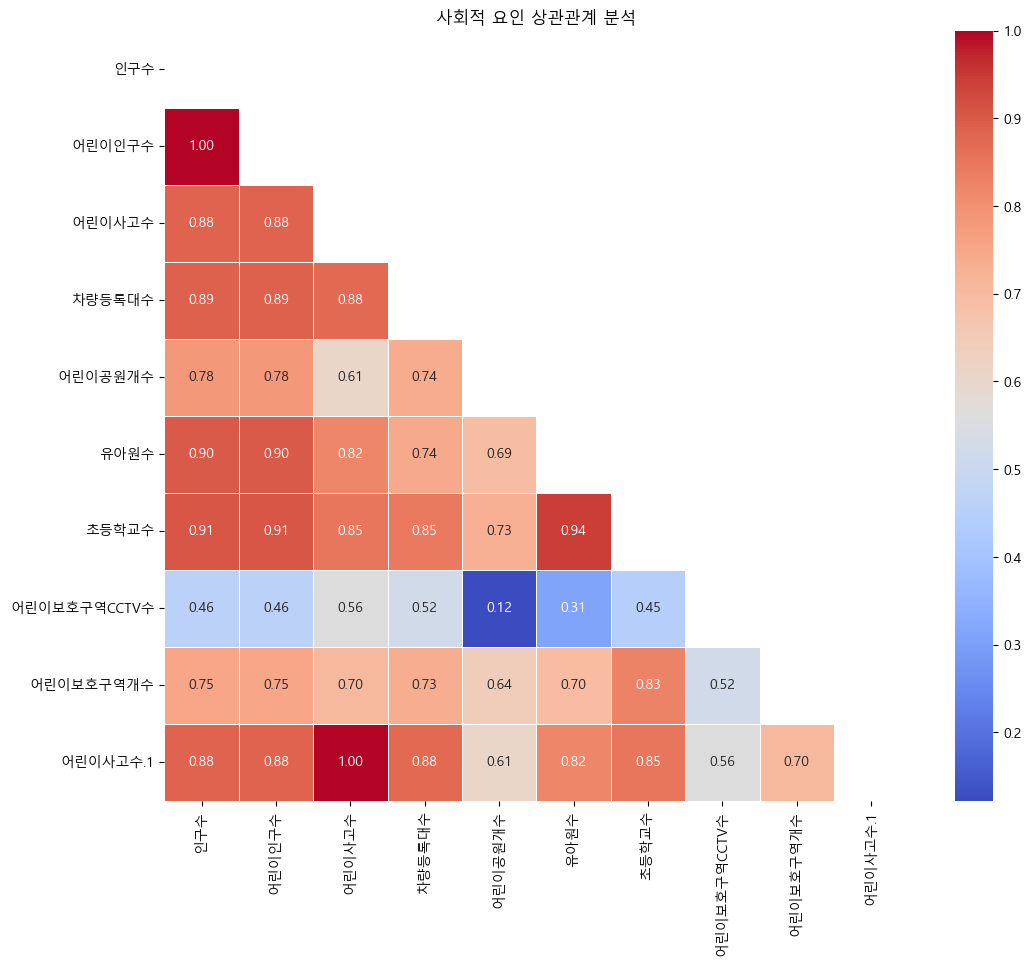

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 데이터 읽기
file_path = "종합서울DB.csv"
df = pd.read_csv(file_path, encoding='cp949')

# '지역구', '유치원수', '어린이집수', '초등학교수' 컬럼 삭제
df = df.drop(columns=['지역구', '유치원수', '어린이집수'])

# 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 상관관계 계산
correlation_matrix = df.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))

# 상관관계 행렬의 아래 삼각형에 마스크 생성
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title("사회적 요인 상관관계 분석")
plt.show()

In [47]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd
from folium import plugins

# CSV 파일 읽기
csv_path = 'merged_result.csv'
df = pd.read_csv(csv_path)

# GeoJSON 데이터의 URL
url = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

raw_data = [
    ['양천구', 0.25],
    ['영등포구', 0.24],
    ['중랑구', 0.24],
    ['구로구', 0.23],
    ['강남구', 0.22],
    ['송파구', 0.21],
    ['광진구', 0.21],
    ['강동구', 0.2],
    ['종로구', 0.19],
    ['강북구', 0.19],
    ['서초구', 0.19],
    ['성북구', 0.19],
    ['금천구', 0.19],
    ['은평구', 0.18],
    ['동대문구', 0.18],
    ['노원구', 0.17],
    ['강서구', 0.17],
    ['동작구', 0.17],
    ['용산구', 0.16],
    ['도봉구', 0.16],
    ['중구', 0.16],
    ['마포구', 0.16],
    ['서대문구', 0.15],
    ['성동구', 0.13],
    ['관악구', 0.12],
]

data = pd. DataFrame(raw_data, columns=['name','value'])
data

# GeoJSON 데이터 불러오기
response = requests.get(url)
geojson_data = response.json()

# 서울 중심에 지도 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# 마커 클러스터 생성
marker_cluster = MarkerCluster().add_to(seoul_map)

# 사고 내역을 지도에 추가
for index, row in df.iterrows():
    # 마커 추가
    folium.Marker([row['lat(위도)'], row['lon(경도)']], 
                  popup=f"<b>{row['사고내용']}</b><br>사망자: {row['사망자수']}명<br>중상자: {row['중상자수']}명<br>경상자: {row['경상자수']}명<br>부상신고자: {row['부상신고자수']}명",
                  icon=folium.Icon(color='red')).add_to(marker_cluster)
    
# MiniMap 추가
minimap = plugins.MiniMap()
seoul_map.add_child(minimap)

# 제목 추가
title_html = '''
             <h3 align="center" style="font-size:20px"><b>서울시 어린이사고 클러스터</b></h3>
             '''

seoul_map.get_root().html.add_child(folium.Element(title_html))

# 지도를 HTML 파일로 저장
seoul_map.save("seoul_child_accidents_map_cluster.html")


In [48]:
import webbrowser

# 생성된 HTML 파일 열기
webbrowser.open('seoul_child_accidents_map_cluster.html')


True

In [49]:
import folium
from folium.plugins import HeatMap
import pandas as pd
from folium import plugins

# CSV 파일 읽기
csv_path = 'merged_result.csv'
df = pd.read_csv(csv_path)

# 서울 중심에 지도 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# 히트맵 데이터 생성
heat_data = [[row['lat(위도)'], row['lon(경도)']] for index, row in df.iterrows()]

# 히트맵 생성
HeatMap(heat_data).add_to(seoul_map)

# MiniMap 추가
minimap = plugins.MiniMap()
seoul_map.add_child(minimap)

# 제목 추가
title_html = '''
             <h3 align="center" style="font-size:20px"><b>서울시 어린이사고 히트맵</b></h3>
             '''

seoul_map.get_root().html.add_child(folium.Element(title_html))

# 지도를 HTML 파일로 저장
seoul_map.save("seoul_child_accidents_heatmap.html")


In [50]:
import webbrowser

# 생성된 HTML 파일 열기
webbrowser.open('seoul_child_accidents_heatmap.html')

True